# Exercices Modélisation 2D
## Exercice 1

$$
\text{Take the matrix } M = \begin{pmatrix}0.87 & -0.5 \\0.5 & 0.87\end{pmatrix} \text{ associated with a transformation } f
$$

1. Let $V_1 = \begin{pmatrix} 1 \\ 1 \end{pmatrix}, V_2 = \begin{pmatrix} 1 \\ 0 \end{pmatrix}, V_3 = \begin{pmatrix} 2 \\ -1 \end{pmatrix}$
    Calculate and represent in the plane the images $V_1' = f(V_1)$, $V_2' = f(V_2)$, $V_3' = f(V_3)$.
$$

$$

In [9]:
import numpy as np
from IPython.display import Latex
from myUtils import numpyArrayToLatex

M = np.array([[0.87, -0.5], [0.5, 0.87]])
V1 = np.array([[1], [1]])
V2 = np.array([[1], [0]])
V3 = np.array([[2], [-1]])

V1p = M @ V1
V2p = M @ V2
V3p = M @ V3

display(Latex(
    "$"
    f"V_1' = {numpyArrayToLatex(V1p, wrap=False, needLatexSigns=False)},"
    f"V_2' = {numpyArrayToLatex(V2p, wrap=False, needLatexSigns=False)},"
    f"V_3' = {numpyArrayToLatex(V3p, wrap=False, needLatexSigns=False)}"
    "$"
))

<IPython.core.display.Latex object>

We note that:
$$
M = \begin{pmatrix} 0.87 & -0.5 \\ 0.5 & 0.87 \end{pmatrix} \approx \begin{pmatrix} \sqrt(3/2) & -1/2 \\ 1/2 & \sqrt(3/2) \end{pmatrix} = \begin{pmatrix} cos(30°) & -sin(30°) \\ sin(30°) & cos(30°) \end{pmatrix} = \begin{pmatrix} cos(\pi/6) & -sin(\pi/6) \\ sin(\pi/6) & cos(\pi/6) \end{pmatrix}
$$

It is then defined as such in our code.


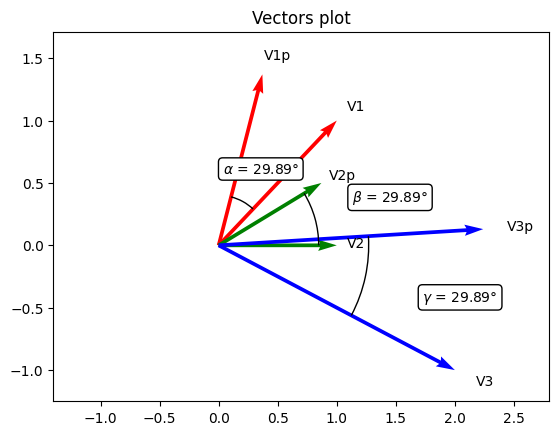

In [10]:
import matplotlib.pyplot as plt
from ArcAnnotation import AngleAnnotation
from math import pi, cos, sin
from myUtils import calculateLimits, plot2DColumnVectorText, angleBetweenVectors

M = np.array([[cos(pi/6), -sin(pi/6)], [sin(pi/6), cos(pi/6)]])

fig, ax = plt.subplots()
ax.set_title("Vectors plot")

vectors = np.array([
    V1,
    V2,
    V3,
    V1p,
    V2p,
    V3p
])

# origin point
origin = np.array([[0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0]])

# Plot the vectors
plt.quiver(
    *origin,
    vectors[:,0],
    vectors[:,1],
    color=['r', 'g', 'b', 'r', 'g', 'b'],
    
    angles='xy',
    scale_units='xy',
    scale=1
)

# Calculate the limits of the plot
xLims, yLims = calculateLimits(vectors, coefficient=1.25)

# Plot the labels
vectorLabels = [
    "V1",
    "V2",
    "V3",
    "V1p",
    "V2p",
    "V3p"
]

for i, vector in enumerate(vectors):
    plot2DColumnVectorText(vectorLabels[i], vector)
    

# Plot the angle annotation
angles = [
    r"$\alpha$",
    r"$\beta$",
    r"$\gamma$"
]

for i, angle in enumerate(angles):
    vec1 = vectors[i]
    vec2 = vectors[i + len(angles)]
    
    
    AngleAnnotation(
        (0, 0),
        vec1,
        vec2,
        ax=ax,
        size=100*(i+1),
        text=angle + " = " + str(angleBetweenVectors(vec1, vec2)) + "°",
        textposition="outside",
        text_kw=dict(bbox=dict(boxstyle="round", fc="w")),
    )



plt.xlim(*xLims)
plt.ylim(*yLims)
plt.show()


We can see that $\alpha = \beta = \gamma$.
It means that the transformation $f$ is a rotation of $\alpha$ degrees around $O$.

## Exercice 2
### Calculate $M^2$

In [18]:
Msquare = M @ M

# round the values to 2 decimals
Msquare = np.round(Msquare, 2)

display(Latex(
    "$"
    f"M^2 = {numpyArrayToLatex(Msquare, wrap=False, needLatexSigns=False)}"
    "$"
))

<IPython.core.display.Latex object>

### Calculate $M^2V_1$

In [19]:
MsquareV1 = Msquare @ V1

display(Latex(
    "$"
    f"M^2V_1 = {numpyArrayToLatex(MsquareV1, wrap=False, needLatexSigns=False)}"
    "$"
))

<IPython.core.display.Latex object>

### Plot $MV_1$ and $M^2V_1$

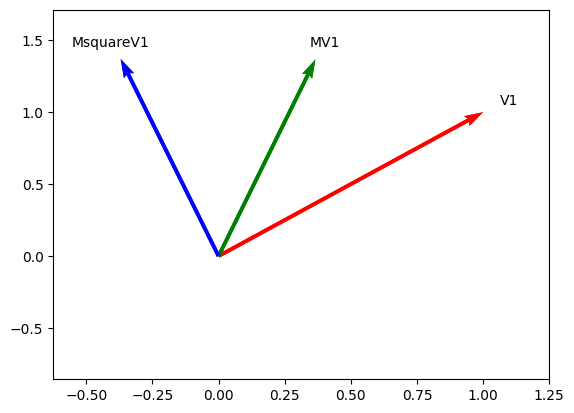

In [24]:
MV1 = M @ V1

origin = np.array([[0, 0],[0, 0]]) # origin point

vectors = [
    V1,
    MV1,
    MsquareV1
]

# In order to properly plot the vectors,
# we need to calculate the limits of the plot
limsX, limsY = calculateLimits(
    vectors,
    coefficient=1.25
)

# Set the new limits
plt.xlim(*limsX)
plt.ylim(*limsY)


labels = [
    "V1",
    "MV1",
    "MsquareV1"
]

for i, vector in enumerate(vectors):
    # Plot the vector
    plt.quiver(
        *origin,
        vector[0],
        vector[1],
        color=[['r', 'g', 'b'][i]],
        
        angles='xy',
        scale_units='xy',
        scale=1
    )
    
    # Plot the vector label
    plot2DColumnVectorText(labels[i], vector)
    
plt.show()